# Project 1

## 1: Demo specific functions

In [1]:
# Import from separate .py files
from ga import *
from p1 import *

In [2]:
# Set parameters

params_1 = {
        'indiv_len': 10,
        'pop_size': 8,              # Has to be even
        'num_parents':8,            # Has to be <= pop_size
        'p_m': 0.1,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }

In [3]:
# DEMO init_pop()

algorithm_1 = GA(params_1, fitness=sine_fitness)
pop = algorithm_1.init_pop()
print(pop)

['1010111110', '1001110111', '0010101010', '1000100010', '1110011101', '1011011111', '0100101110', '0000010110']


In [4]:
# DEMO select_parents()

parents = algorithm_1.select_parents(pop)
print('\nParents selcted to make offsprings:\n', parents)


Parents selcted to make offsprings:
 ['0000010110', '1001110111', '1110011101', '0010101010', '0000010110', '0010101010', '0000010110', '0100101110']


In [5]:
# DEMO make_offsprings()

dummy_parents = ['11111', '00000', '11111', '00000', '11111', '00000', '11111', '00000']

# Crossover
crossover_offsprings = algorithm_1.crossover(dummy_parents)
print('Crossover:\n', crossover_offsprings)

# Mutation
mutation_offsprings = algorithm_1.mutate(dummy_parents)
print('\nMutation:\n', mutation_offsprings)

# Make offsprings
offsprings = algorithm_1.make_offsprings(dummy_parents)
print('\n\nA new generation:\n', offsprings)

Crossover:
 ['10000', '01111', '10000', '01111', '10000', '01111', '11100', '00011']

Mutation:
 ['11110', '00000', '11111', '00000', '10111', '00100', '11111', '00000']


A new generation:
 ['11100', '00011', '10001', '01110', '10000', '01111', '10000', '01111']


## 2: Demo GA - Sine [0, 128]

In [6]:
# DEMO run(), the complete GA with sine fitness function

params_2 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 50, 
        'sine_constraint': False
    }
algorithm_2 = GA(params_2, fitness=sine_fitness)
eval_log_2 = algorithm_2.run()

Algorithm succsessfully executed


In [7]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_2.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation:', generation, '\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[3]], '\n\n')
        

Generation: 0 

Population: ['001111011011110', '001111000010011', '100100101010011', '101100011001111', '110001011011101', '010010100000000', '101011110100110', '000101000100101', '100111000110000', '011011010011101', '011001100001111', '011010010001000', '111010100001011', '001100000111101', '110111111110000', '011101101110111', '000101011110010', '111100011011100', '011100101100001', '100011100010111'] 

Population weights: [0.02964554 0.00154485 0.00762364 0.10848808 0.00021294 0.02206981
 0.04273683 0.02109673 0.08349582 0.00400558 0.10632788 0.10977832
 0.01730869 0.01359894 0.00509494 0.07594284 0.         0.12392641
 0.10791556 0.11918661] 

Population sine fitness value: ['-0.52', '-0.97', '-0.88', '0.75', '-1.00', '-0.64', '-0.31', '-0.66', '0.35', '-0.93', '0.71', '0.77', '-0.72', '-0.78', '-0.92', '0.22', '-1.00', '1.00', '0.74', '0.92'] 


Generation: 10 

Population: ['001101011001110', '001010100011000', '001101001001110', '001101011101110', '001010010001110', '001010100

<IPython.core.display.Javascript object>


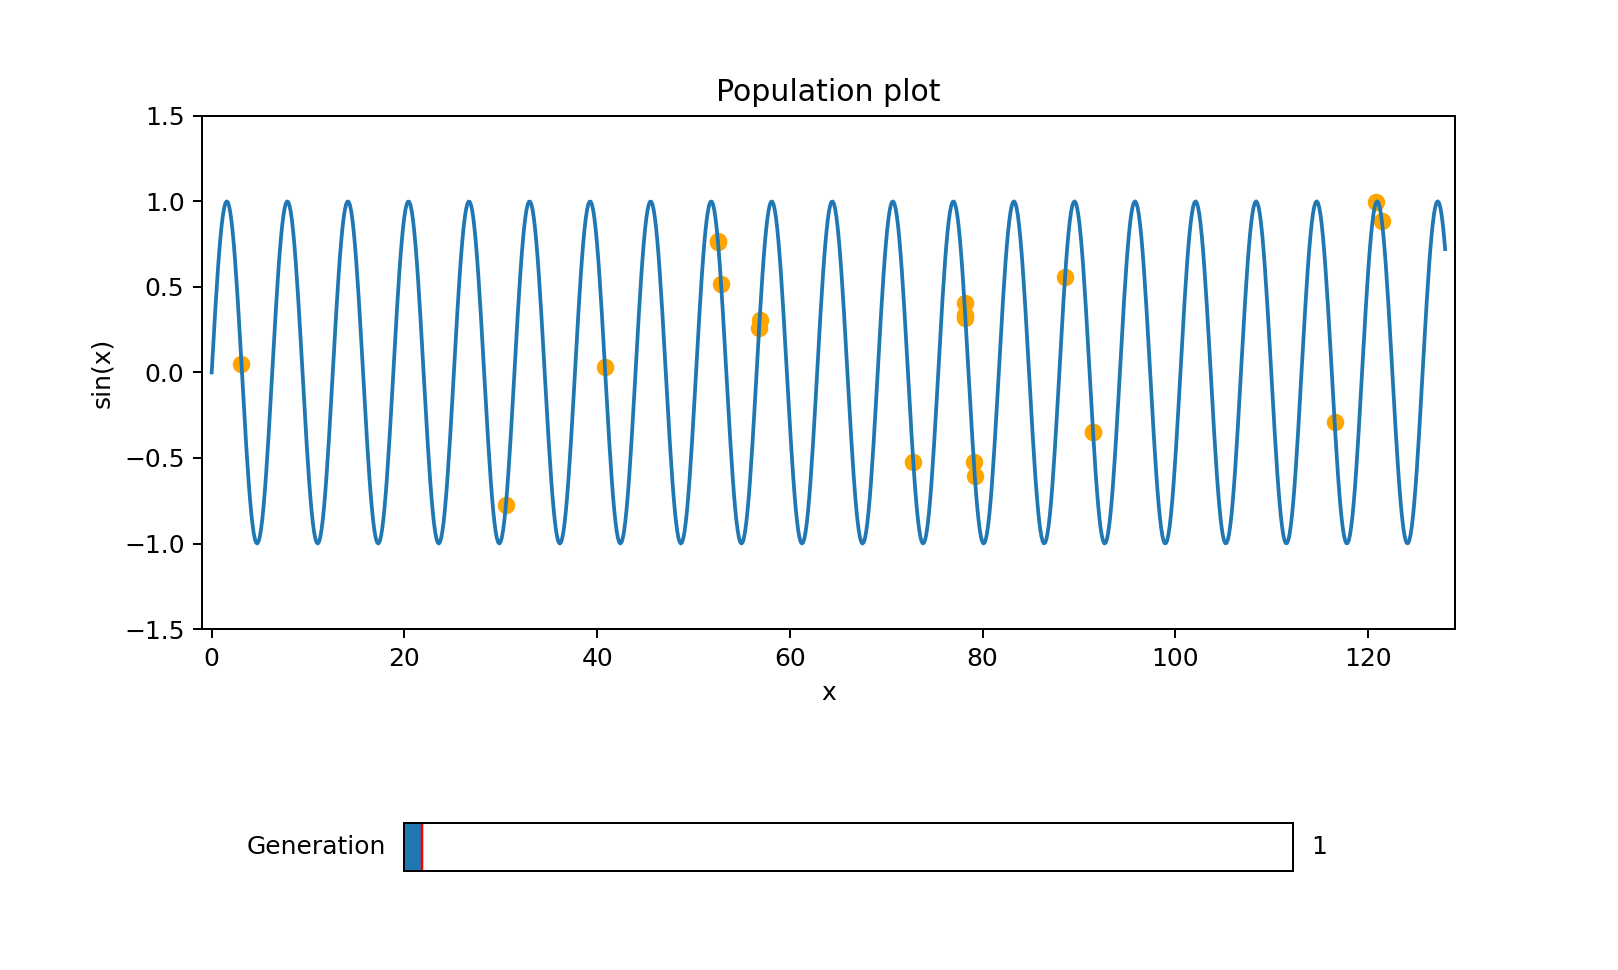

0

In [8]:
# Plot the population through the generations

%matplotlib notebook
from ipywidgets import *
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button


DATA = eval_log_2

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][2]
y = DATA[i][3]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_2['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][2], DATA[gen][3]])

generation.on_changed(update)


    


<IPython.core.display.Javascript object>


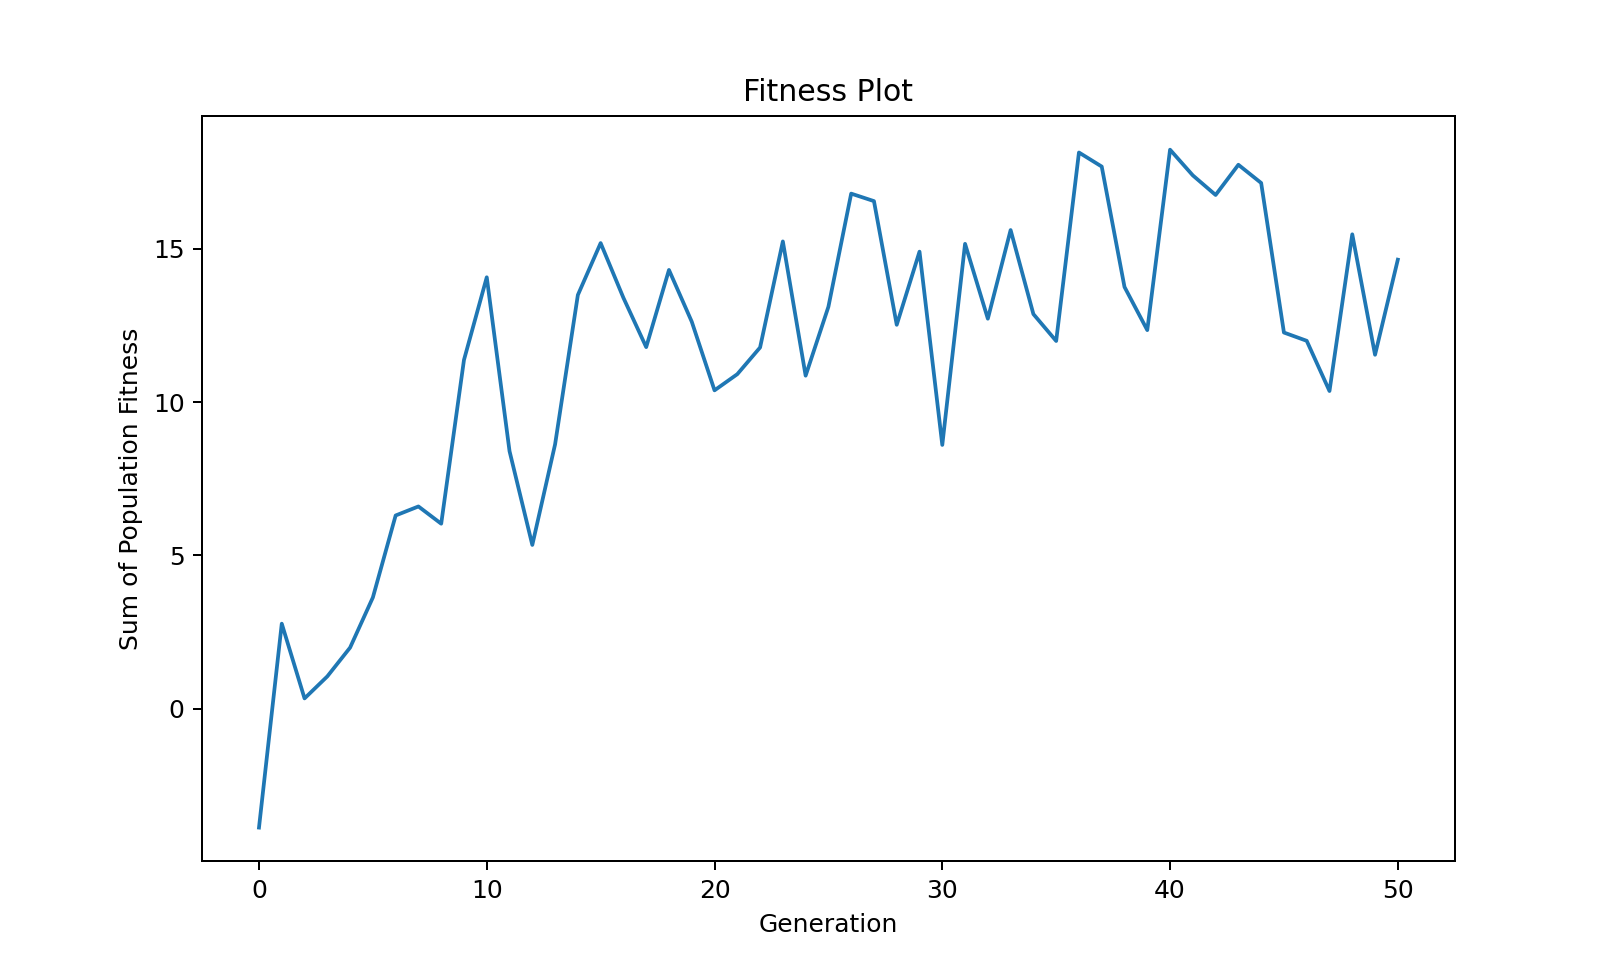

In [9]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_2[i][3]) for i in eval_log_2.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 3: Demo GA - Sine [0, 128] with [5, 10]-constraint

In [10]:
params_3 = {
        'indiv_len': 15,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 50, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_3 = GA(params_3, fitness=sine_fitness)
eval_log_3 = algorithm_3.run()


Algorithm succsessfully executed


In [11]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_3.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation:', generation, '\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population sine fitness value:', ['{:.2f}'.format(item) for item in data[3]], '\n\n')

Generation: 0 

Population: ['111111001011111', '100101011100001', '101110100011000', '001011011000011', '001010001110111', '011111010100011', '111001010101010', '101010000110000', '111000010111000', '110001011000000', '010000011010110', '100100110010100', '000010010110010', '010101000101011', '001100001000011', '011101000000011', '100001100101101', '000110101101000', '000100110010101', '000100001111101'] 

Population weights: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.34723257 0.65276743] 

Population sine fitness value: ['-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-1.25', '-0.16', '0.81'] 


Generation: 10 

Population: ['000100000100011', '000100001110011', '000100000000100', '000100010010101', '000100001110001', '000100011101100', '0001000

<IPython.core.display.Javascript object>


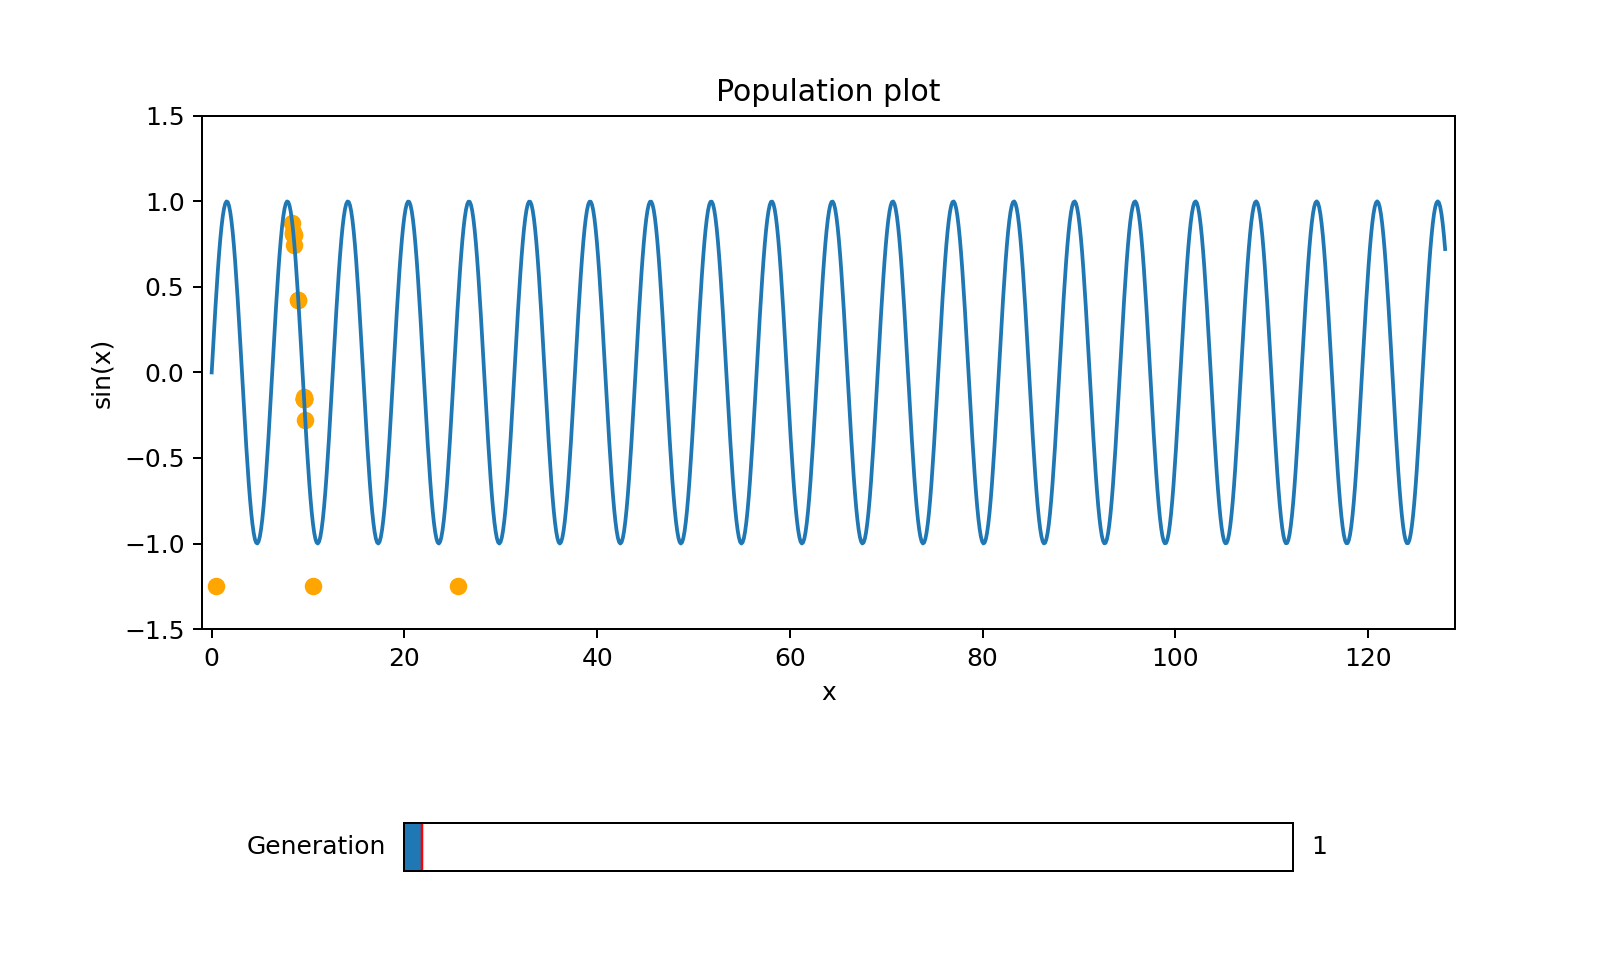

0

In [12]:
# Plot the generations

DATA = eval_log_3

x_sine = np.linspace(0, 128, 1000)
y_sine = np.sin(x_sine)

fig, axs = plt.subplots(figsize=(5,3))
plt.subplots_adjust(bottom=0.35)
plt.title("Population plot")
plt.xlabel("x")
plt.ylabel("sin(x)");
plt.xlim(-1, 129)
plt.ylim(-1.5, 1.5)
line, = axs.plot(x_sine, y_sine)

i = 1
x = DATA[i][2]
y = DATA[i][3]

dots = axs.scatter(x, y, marker='o', color='orange')

ax = plt.axes([0.25, 0.1, 0.55, 0.05])
generation = Slider(ax, label='Generation', valmin=0, valmax=params_3['max_gen'], valstep=1, valinit=i)

def update(val):
    gen = generation.val
    dots.set_offsets(np.c_[DATA[gen][2], DATA[gen][3]])

generation.on_changed(update)


<IPython.core.display.Javascript object>


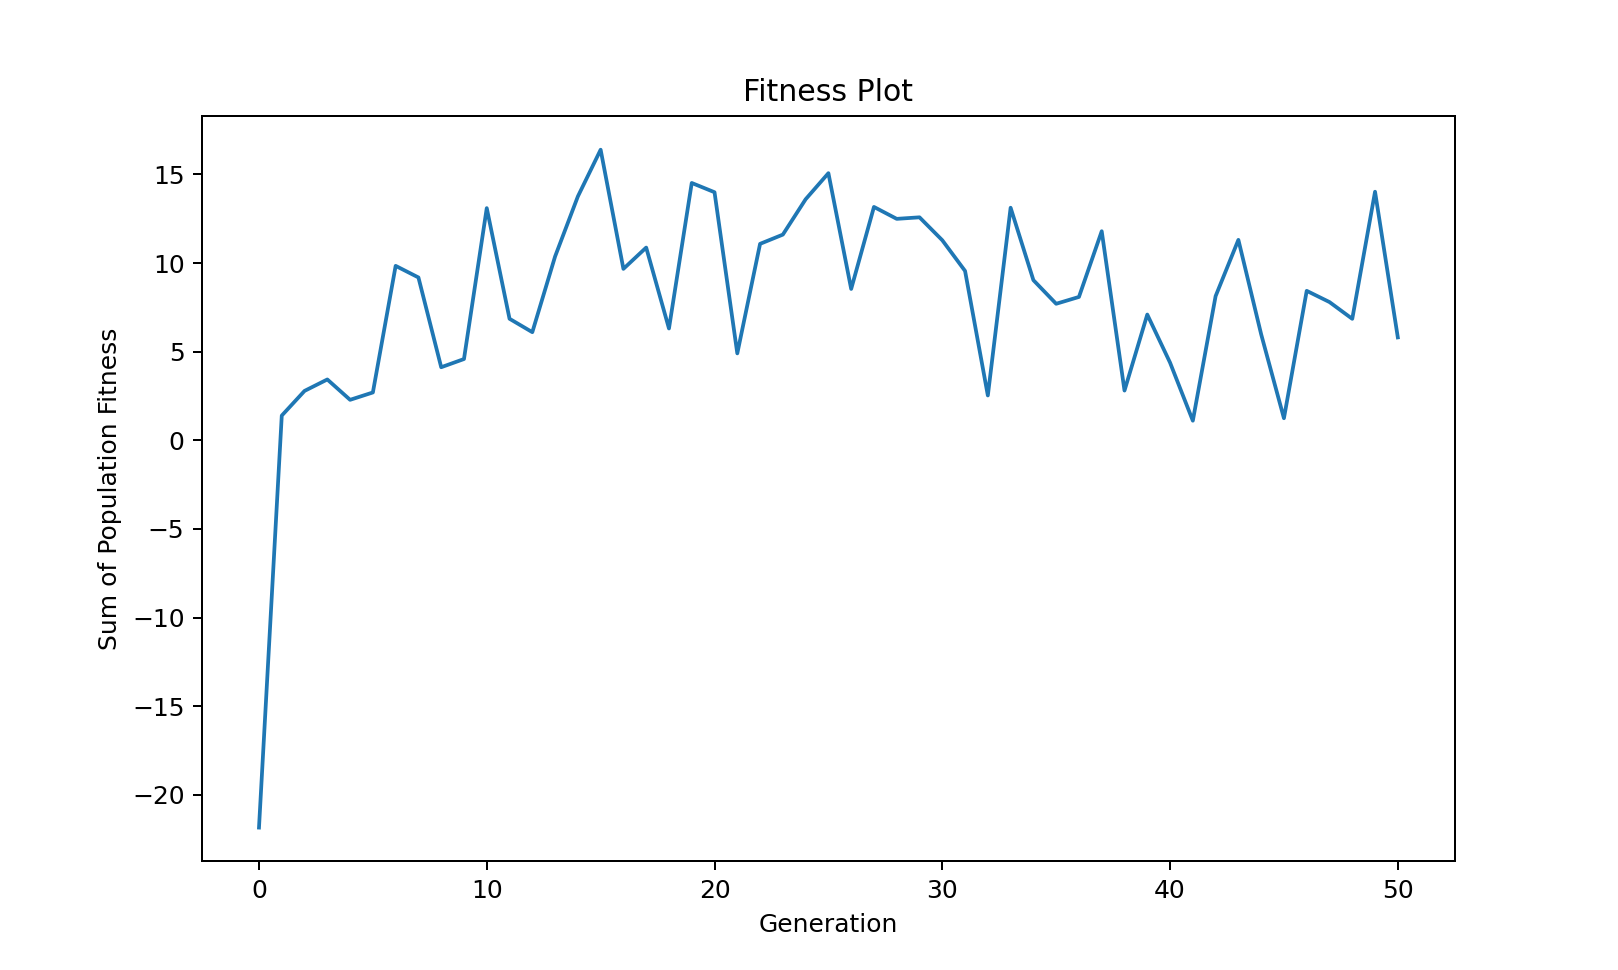

In [13]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_3[i][3]) for i in eval_log_3.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population Fitness");
axs.plot(gen_fitness)

## 4: Demo GA - Feature selection

In [14]:
# View data set

data_df = pd.read_csv('data/data.csv', index_col=[0])
values_df = pd.read_csv('data/values.csv', index_col=[0])
display(data_df, values_df)

,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,8.0,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.32,0.20
1,53.0,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.00,0.67
2,24.0,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.00,0.43
3,34.0,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.00,0.12
4,42.0,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.00,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1988,28.0,10.0,0.02,0.41,1.00,0.21,0.02,0.01,0.54,0.57,...,0.01,0.75,0.57,0.74,0.71,0.03,0.17,0.02,0.00,0.19
1989,12.0,10.0,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,...,0.22,0.28,0.34,0.48,0.39,0.01,0.28,0.05,0.00,0.09
1990,6.0,10.0,0.05,0.96,0.46,0.28,0.83,0.32,0.69,0.86,...,0.53,0.25,0.17,0.10,0.00,0.02,0.37,0.20,0.00,0.45
1991,9.0,10.0,0.16,0.37,0.25,0.69,0.04,0.25,0.35,0.50,...,0.25,0.68,0.61,0.79,0.76,0.08,0.32,0.18,0.91,0.23


,0,1,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,101
0,6.0,10.0,0.2,0.78,0.14,0.46,0.24,0.77,0.5,0.62,...,0.68,0.5,0.34,0.35,0.68,0.11,0.3,0.05,1.0,0.48


In [15]:
params_4 = {
        'indiv_len': 102,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 10, 
        'sine_constraint': False
    }

algorithm_4 = GA(params_4, fitness=feature_fitness)

In [16]:
# RMSE Error Without Feature Selection
import LinReg


linreg = LinReg.LinReg()
feats = values_df.to_numpy().shape[1]
x = data_df.to_numpy().reshape(feats, data_df.to_numpy().shape[0])
y = values_df.to_numpy().reshape(feats, 1)
error = linreg.get_fitness(x, y)

print('Error without feture selection:', error)
    

Error without feture selection: 1.1948934351036553


In [17]:
eval_log_4 = algorithm_4.run()

Algorithm succsessfully executed


In [18]:
# Generational data: population, real value, fitness value
gen_print = 10

for generation, data in eval_log_4.items():
    if generation % gen_print == 0:
        # 0: pop, 1: weights, 2: x-values, 3: fitness
        print('Generation', generation, ':\n')
        print('Population:', data[0], '\n')
        print('Population weights:', data[1], '\n')
        print('Population RMSE error:', ['{:.3f}'.format(item) for item in data[3]], '\n\n')

Generation 0 :

Population: ['101010000101111000000111000101000111011011000111010010000010110111011111101101010110101110111110100011', '101011110111110010001101101000000110110000110010010011011101101001001010000110011001100111000010111010', '011111111001000001110001101010100111100010110111010100000010000010101001010101100100100100111100110110', '001010101101001011100011001010000111110000111010111011111111010010011010110111010001111011110110011101', '101101110000100011101001010110101100000111101010010111100001010100111110111001010010110100101110100100', '011101110101001100110010100000111111101011110100100110010110100100001110110001100110100010101111001000', '011010110000101010010110101010001000001010001011101001010101110001011110101110100110111000101110100101', '001101110111001100100111100000111001110001110111011010110001110000100001100100111110010111010100001101', '100100100110001111100010100000100100010111101000110010001000101011101100001001000011011110011111000010', '0010111001010011

<IPython.core.display.Javascript object>


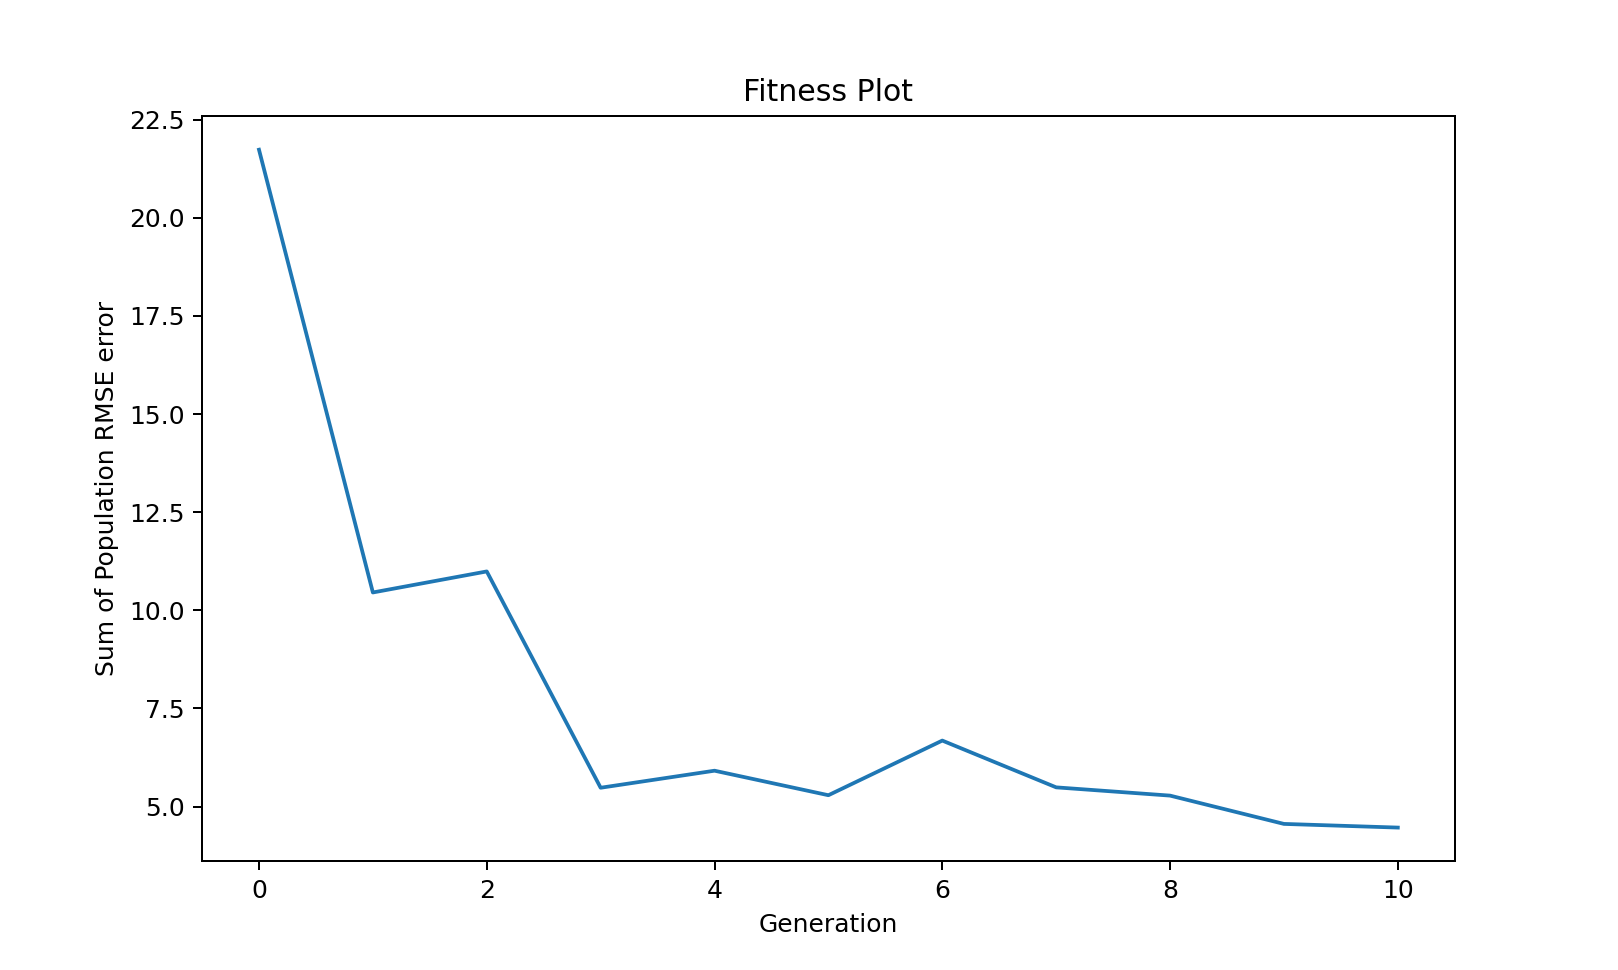

In [19]:
# Plot the fitness sum per generation

gen_fitness = [np.sum(eval_log_4[i][3]) for i in eval_log_4.keys()]

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Fitness Plot")
plt.xlabel("Generation")
plt.ylabel("Sum of Population RMSE error");
axs.plot(gen_fitness)



In [20]:
# Print key measures
print('Last 10 generation average: min, mean, medidan:')
min_list = [min(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]
mean_list = [np.mean(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]
median_list = [np.median(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]]

print(['{:.3f}'.format(item) for item in [np.mean(min_list), np.mean(mean_list), np.mean(median_list)]], '\n')
min_list.sort()
print('Five fittest individuals:', ['{:.3f}'.format(item) for item in min_list[:5]])

Last 10 generation average: min, mean, medidan:
['0.168', '0.323', '0.262'] 

Five fittest individuals: ['0.135', '0.140', '0.153', '0.154', '0.154']


In [21]:
min_dict = {eval_log_4[i][np.argmin(min(eval_log_4[i][3]))][3]:min(eval_log_4[i][3]) for i in list(eval_log_4.keys())[-10:]}
print('The best individuals from the last 10 generations:\n')
for key, value in min_dict.items():
    print(key, 'Fitness: {:.3f}'.format(value))


The best individuals from the last 10 generations:

101010000101111000000111000101000111011011000111010110000010110111011111101101010110101110111110100011 Fitness: 0.192
101011110111110010001101101000000110110000110010010011011101101001001011000110011001000111000010111010 Fitness: 0.135
111010011000110000001000110101101110011101110000110010110001101111001110010101110010010001110010110000 Fitness: 0.196
101011110111110010001101101000000110110000110010010011011101101001011011000110011101000111000010111010 Fitness: 0.153
101101110000100011101001010110101100000111101010010111100001010100111110111011001011110100001110100100 Fitness: 0.197
101000000010011010101011111111111001001000000001111100001000000011100010110110101001111000011110001010 Fitness: 0.140
101011110111110010001101101000000110110000110010010011011101101001001011000110011101000111110110111110 Fitness: 0.178
100001001010100010010001101011100100111111001010010101100010110100001000111010010001111000010101101010 Fitness: 0.184
0000

## 5: Demo GA - Sine [5, 10] with Crowding

In [40]:
params_5 = {
        'indiv_len': 30,
        'pop_size': 20,              # Has to be even
        'num_parents':20,            # Has to be <= pop_size
        'p_m': 0.05,
        'p_c': 0.6,
        'max_sine_exp': 7,          # 2^7 -> [0,128]
        'max_gen': 50, 
        'sine_constraint': True     # THIS ONE IS TRUE NOW
    }

algorithm_5 = GA(params_5, fitness=sine_fitness, survival_selecter=crowding_selection)
eval_log_5 = algorithm_5.run()

Algorithm succsessfully executed


<IPython.core.display.Javascript object>


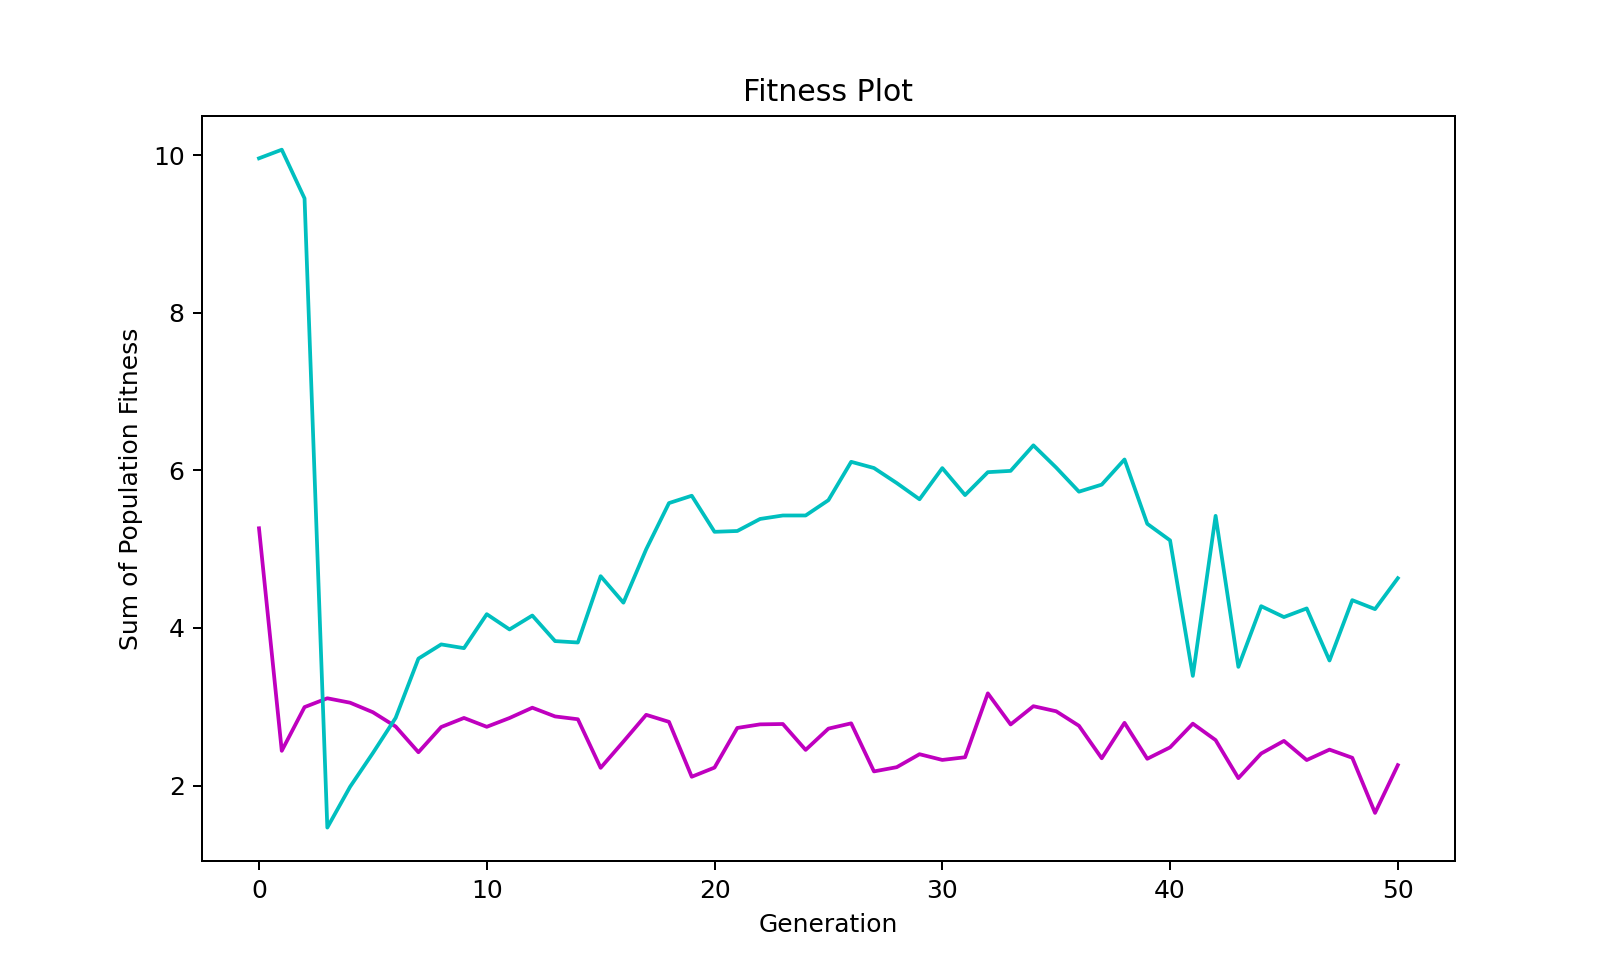

In [41]:
# Plot the fitness sum per generation

gen_entropy = [eval_log_3[i][4] for i in eval_log_3.keys()]          # ORIGINAL
gen_entropy_crow = [eval_log_5[i][4] for i in eval_log_5.keys()]     # WITH CROWDING
#print(gen_entropy, gen_entropy_crow)

# Plot
fig, axs = plt.subplots(figsize=(5,3))
plt.title("Entropy Plot")
plt.xlabel("Generation")
plt.ylabel("Entropy of Population");
plt.plot(gen_entropy, color='m')
plt.plot(gen_entropy_crow, color='c')


## 5: Demo GA - Feature selection with Crowding